In [1]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\Owner'

In [3]:
df = pd.read_csv(r"C:\\Users\\Owner\Desktop\AMZN.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/8/2008,76.779999,81.209999,76.290001,80.510002,80.510002,9162700
1,8/11/2008,80.180000,91.750000,79.779999,88.089996,88.089996,25070200
2,8/12/2008,87.320000,88.480003,86.099998,87.250000,87.250000,8026500
3,8/13/2008,86.279999,88.250000,84.540001,86.690002,86.690002,7208800
4,8/14/2008,85.709999,88.750000,85.220001,88.029999,88.029999,6901700
...,...,...,...,...,...,...,...
1984,6/27/2016,692.010010,696.820007,682.119995,691.359985,691.359985,5568000
1985,6/28/2016,700.000000,708.000000,698.169983,707.950012,707.950012,4037000
1986,6/29/2016,715.750000,719.500000,713.539978,715.599976,715.599976,3070100
1987,6/30/2016,717.200012,719.369995,712.539978,715.619995,715.619995,2855100


In [5]:
df_d = df.reset_index()['Date']

In [6]:
df_d

0        8/8/2008
1       8/11/2008
2       8/12/2008
3       8/13/2008
4       8/14/2008
          ...    
1984    6/27/2016
1985    6/28/2016
1986    6/29/2016
1987    6/30/2016
1988     7/1/2016
Name: Date, Length: 1989, dtype: object

In [7]:
df_h = df.reset_index()['Open']
df_h

0        76.779999
1        80.180000
2        87.320000
3        86.279999
4        85.709999
           ...    
1984    692.010010
1985    700.000000
1986    715.750000
1987    717.200012
1988    717.320007
Name: Open, Length: 1989, dtype: float64

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/8/2008,76.779999,81.209999,76.290001,80.510002,80.510002,9162700
1,8/11/2008,80.180000,91.750000,79.779999,88.089996,88.089996,25070200
2,8/12/2008,87.320000,88.480003,86.099998,87.250000,87.250000,8026500
3,8/13/2008,86.279999,88.250000,84.540001,86.690002,86.690002,7208800
4,8/14/2008,85.709999,88.750000,85.220001,88.029999,88.029999,6901700


In [9]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1984,6/27/2016,692.010010,696.820007,682.119995,691.359985,691.359985,5568000
1985,6/28/2016,700.000000,708.000000,698.169983,707.950012,707.950012,4037000
1986,6/29/2016,715.750000,719.500000,713.539978,715.599976,715.599976,3070100
1987,6/30/2016,717.200012,719.369995,712.539978,715.619995,715.619995,2855100
1988,7/1/2016,717.320007,728.000000,716.539978,725.679993,725.679993,2920400


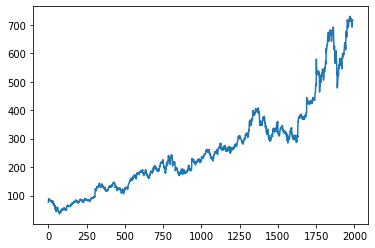

In [10]:
import matplotlib.pyplot as plt
plt.plot(df_h)

In [11]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_h = scaler.fit_transform(np.array(df_h).reshape(-1,1))
df_h.shape

(1989, 1)

In [15]:
df_h

array([[0.05973222],
       [0.06462712],
       [0.07490642],
       ...,
       [0.97964294],
       [0.98173049],
       [0.98190324]])

In [18]:
trng_size = int(len(df_h) * 0.65)
test_size = len(df_h) - trng_size
train_data = df_h[0:trng_size, :]
test_data = df_h[trng_size: len(df_h), :1]

In [19]:
len(train_data)

1292

In [22]:
import numpy 
def create_dataset(dataset, time_step = 1):
    data_x = []
    data_y = []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i + time_step), 0]
        data_x.append(a)
        data_y.append(dataset[i + time_step, 0])
    return numpy.array(data_x), numpy.array(data_y)

In [23]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [24]:
print(x_train)

[[0.05973222 0.06462712 0.07490642 ... 0.02663403 0.02323639 0.02047221]
 [0.06462712 0.07490642 0.07340915 ... 0.02323639 0.02047221 0.02224302]
 [0.07490642 0.07340915 0.07258854 ... 0.02047221 0.02224302 0.02312122]
 ...
 [0.30820615 0.31472788 0.3075871  ... 0.377685   0.38694211 0.40092137]
 [0.31472788 0.3075871  0.31795279 ... 0.38694211 0.40092137 0.39915059]
 [0.3075871  0.31795279 0.32076014 ... 0.40092137 0.39915059 0.40126692]]


In [25]:
print(x_train.shape), print(y_train.shape)

(1191, 100)
(1191,)


(None, None)

In [35]:
print(x_test.shape), print(y_test.shape)

(596, 100, 1)
(596,)


(None, None)

In [26]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [32]:
model = Sequential()
model.add(LSTM(80, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(120))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 80)           26240     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 100)          72400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 120)               106080    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 121       
Total params: 204,841
Trainable params: 204,841
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 150, batch_size = 64, verbose = 1)

Epoch 1/150
19/19 [==============================] - 7s 358ms/step - loss: 3.0619e-05 - val_loss: 4.3285e-04
Epoch 2/150
19/19 [==============================] - 7s 348ms/step - loss: 3.3797e-05 - val_loss: 4.3676e-04
Epoch 3/150
19/19 [==============================] - 7s 350ms/step - loss: 5.3391e-05 - val_loss: 6.4635e-04
Epoch 4/150
19/19 [==============================] - 7s 358ms/step - loss: 5.0563e-05 - val_loss: 4.3619e-04
Epoch 5/150
19/19 [==============================] - 7s 380ms/step - loss: 3.8955e-05 - val_loss: 4.5769e-04
Epoch 6/150
19/19 [==============================] - 7s 367ms/step - loss: 2.9909e-05 - val_loss: 4.6568e-04
Epoch 7/150
19/19 [==============================] - 8s 442ms/step - loss: 3.0959e-05 - val_loss: 4.4041e-04
Epoch 8/150
19/19 [==============================] - 10s 505ms/step - loss: 3.7573e-05 - val_loss: 4.3062e-04
Epoch 9/150
19/19 [==============================] - 9s 483ms/step - loss: 3.0313e-05 - val_loss: 4.6665e-04
Epoch 10/150
19/19

In [71]:
import tensorflow as tf

In [72]:
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

In [73]:
predict_train = scaler.inverse_transform(predict_train)
predict_test = scaler.inverse_transform(predict_test)

In [74]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, predict_train))

191.46038497557265

In [75]:
math.sqrt(mean_squared_error(y_test, predict_test))

471.2845717643541

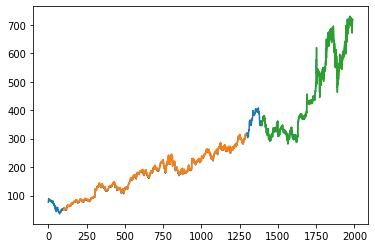

In [76]:
# Shifts train predictions for Plotting 
import numpy
look_back = 100
trainPredictPlot = numpy.empty_like(df_h)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back: len(predict_train) + look_back: ] = predict_train
# Shifts train predictions for Plotting 
testPredictPlot = numpy.empty_like(df_h)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(predict_train) + (look_back*2)  + 1: len(df_h) - 1, : ] = predict_test
plt.plot(scaler.inverse_transform(df_h))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [77]:
len(test_data)

697

In [78]:
test_input = test_data[597:].reshape(1,-1)
test_input.shape

(1, 100)

In [79]:
temp_input = list(test_input)
temp_input = temp_input[0].tolist()
temp_input

[0.6571695937224671,
 0.6563201883263998,
 0.6844370881340063,
 0.6970774103669971,
 0.710408838258388,
 0.7283328402006048,
 0.6988482741378118,
 0.7297869288554318,
 0.7490065887041574,
 0.7348977666447325,
 0.7489634444493403,
 0.7555859248802146,
 0.7467751058812964,
 0.7500719356449652,
 0.7867261560406476,
 0.7812698100521488,
 0.7857471854298005,
 0.7749063722305078,
 0.7523466505429699,
 0.754779709808644,
 0.7651165826207427,
 0.7654189465651234,
 0.7654909131631545,
 0.7712496230960341,
 0.7793694256965563,
 0.7691045180428112,
 0.7567664704941971,
 0.7394471086204153,
 0.7339763514603095,
 0.7568528482638354,
 0.7656492560911464,
 0.7905413359234398,
 0.7844227066197553,
 0.8082637628625212,
 0.8119637440721387,
 0.7993089228472143,
 0.8115605926261901,
 0.7997120757328404,
 0.7950331239123758,
 0.8112150844269921,
 0.8048229120824636,
 0.8074431366193436,
 0.8106968206885178,
 0.8240569831027961,
 0.8346962198592757,
 0.8445579760670721,
 0.8494960597567738,
 0.866469913431

In [80]:
from numpy import array 

output_lst = []
n_steps = 100
i = 0
while (i < 30):
    if(len(temp_input)>100):
        #print(temp_input)
        test_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,test_input))
        test_input=test_input.reshape(1,-1)
        test_input=test_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(test_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output_lst.extend(yhat.tolist())
        i=i+1
    else:
        test_input = test_input.reshape((1, n_steps,1))
        yhat = model.predict(test_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        output_lst.extend(yhat.tolist())
        i=i+1
print(output_lst)

[0.9761094]
101
1 day input [0.65632019 0.68443709 0.69707741 0.71040884 0.72833284 0.69884827
 0.72978693 0.74900659 0.73489777 0.74896344 0.75558592 0.74677511
 0.75007194 0.78672616 0.78126981 0.78574719 0.77490637 0.75234665
 0.75477971 0.76511658 0.76541895 0.76549091 0.77124962 0.77936943
 0.76910452 0.75676647 0.73944711 0.73397635 0.75685285 0.76564926
 0.79054134 0.78442271 0.80826376 0.81196374 0.79930892 0.81156059
 0.79971208 0.79503312 0.81121508 0.80482291 0.80744314 0.81069682
 0.82405698 0.83469622 0.84455798 0.84949606 0.86646991 0.85619059
 0.85763027 0.84822914 0.83691329 0.85067661 0.82998845 0.83537283
 0.90801898 0.90502443 0.9243737  0.90310972 0.91854302 0.89369418
 0.91946444 0.94832995 0.96530372 0.98198962 0.97804492 0.97155196
 0.97122086 0.94193778 0.94527784 0.95847966 0.96308665 0.95410307
 0.96848544 0.96896056 0.97856318 0.97471927 0.98705731 0.98715801
 0.99546498 0.99511947 1.         0.99497554 0.99022453 0.98914478
 0.97713791 0.97471927 0.98864092 

In [81]:
train_day = np.arange(1, 101)
test_day = np.arange(101, 131)

In [82]:
import matplotlib.pyplot as plt

In [83]:
len(df_h)

1989

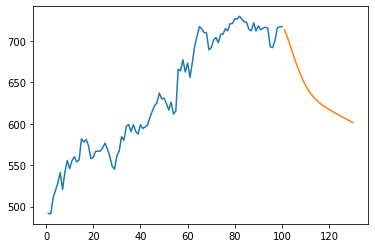

In [84]:
plt.plot(train_day, scaler.inverse_transform(df_h[1889:]))
plt.plot(test_day, scaler.inverse_transform(output_lst))

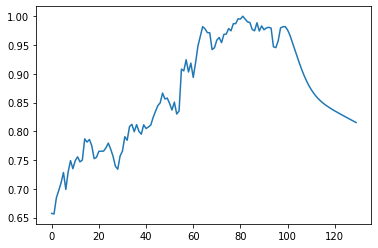

In [85]:
df_final = df_h.tolist()
df_final.extend(output_lst)
plt.plot(df_final[1889:])

In [86]:
df_final = scaler.inverse_transform(df_final).tolist()

In [87]:
df_final

[[76.779999],
 [80.18],
 [87.31999999999998],
 [86.279999],
 [85.709999],
 [88.27999899999999],
 [86.089996],
 [83.089996],
 [82.0],
 [81.410004],
 [84.269997],
 [84.629997],
 [82.739998],
 [81.440002],
 [82.209999],
 [82.900002],
 [83.160004],
 [81.400002],
 [80.599998],
 [77.339996],
 [82.25],
 [80.760002],
 [80.010002],
 [75.269997],
 [78.809998],
 [76.860001],
 [76.800003],
 [77.68],
 [73.08000200000001],
 [80.120003],
 [81.129997],
 [75.790001],
 [72.300003],
 [70.660004],
 [69.519997],
 [68.410004],
 [65.839996],
 [71.779999],
 [67.629997],
 [69.41999799999999],
 [64.059998],
 [65.790001],
 [55.639998999999996],
 [61.970001],
 [52.990002000000004],
 [58.959998999999996],
 [63.5],
 [54.459998999999996],
 [46.400002],
 [48.830002],
 [52.169998],
 [51.86000100000001],
 [50.049999],
 [43.369999],
 [44.75000000000001],
 [49.0],
 [51.50000000000001],
 [55.529999],
 [58.759997999999996],
 [56.009997999999996],
 [56.34999799999999],
 [57.15999999999999],
 [57.47000100000001],
 [49.799999

In [66]:
df_final[1989:]

[[711.1689701776305],
 [693.3535806979739],
 [667.4273282752216],
 [637.0239298519673],
 [604.814934134706],
 [572.6648525912817],
 [541.9610871046498],
 [513.8401471519677],
 [489.2013122623356],
 [468.61745342899326],
 [452.28584826145055],
 [440.070534604486],
 [431.6063522239178],
 [426.4088220879548],
 [423.9562453178074],
 [423.7375217897821],
 [425.27583172870067],
 [428.1363363658996],
 [431.92779259332684],
 [436.3009797108323],
 [440.9464637512645],
 [445.59207199585796],
 [450.0008643062655],
 [453.96984968155806],
 [457.3297792512894],
 [459.9440698394317],
 [461.71000460460107],
 [462.55852603312235],
 [462.4552295723192],
 [461.39961840554645]]

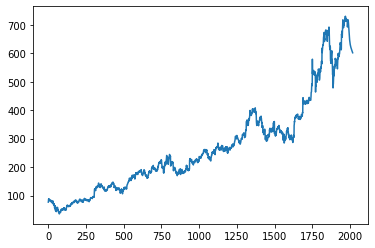

In [88]:
plt.plot(df_final)

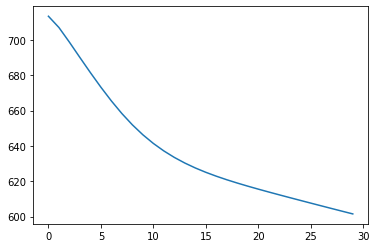

In [89]:
plt.plot(df_final[1989:])

In [90]:
len(df_final[1989:])

30